(21, 2)
(21, 1)
(9, 2)
(9, 1)
R2 score is  0.7133344416146168
MSE is  233225.43577279936
RMSE is  482.93419403972564
MAE is  380.5925898740936
[744.10078123]
[[369.48466045 279.56163579]]
(21, 1)
(21, 1)
(9, 1)
(9, 1)
R2 score is  0.6283052363522601
MSE is  302403.517585013
RMSE is  549.912281718651
MAE is  465.18860483619886


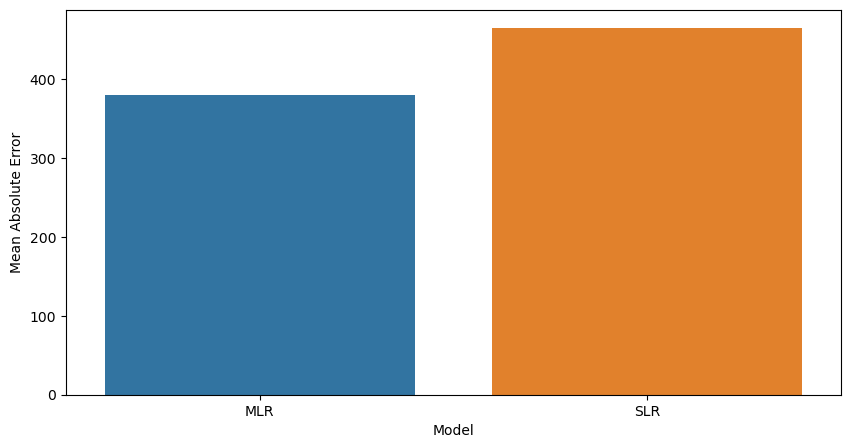

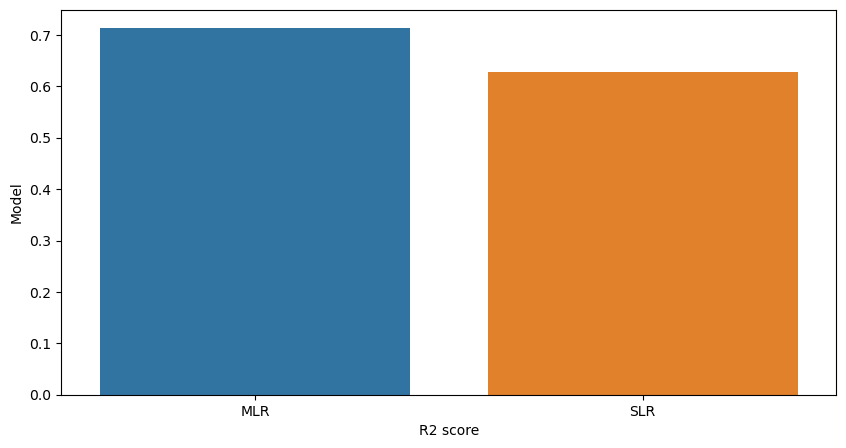

0.6283052363522601
0.781734666745076
0.6473388173433584
0.7813337107661052
0.7262348918131638
0.7500740459160584


,Model,Train_Score
0,SLR,0.781735
1,Lasso,0.781334
2,Ridge,0.726235


In [2]:

#Multiple Linear Regression


#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

#Read the training data
train_data = pd.read_csv('SalaryDatatest.csv')

#Print the data
train_data.head()

#Print the dimesnion of the data
train_data.shape

#separating X train and Y train
X_train = train_data[['AgeAbove50','YearsExperience']]
Y_train = train_data[['Salary']]

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)

#print the shape of train and test data after spltting
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#Load the model and fit
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression(fit_intercept = True)

model.fit(X_train, Y_train)

#Predict the salary for test data
Y_pred =  model.predict(X_test)

#Evaluation metrics to evaluate the performance of the MLR model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

Rsquared = r2_score(Y_test,Y_pred)
print('R2 score is ',Rsquared)

MSE = mean_squared_error(Y_test,Y_pred)
print('MSE is ', MSE)

RMSE = math.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE is ', RMSE)

MAE = mean_absolute_error(Y_test, Y_pred)
print ('MAE is ', MAE)

#Retrieve the intercept and coefficients (theta 0; theta 1, theta 2)
print(model.intercept_)
print(model.coef_)

"""Simple Linear Regression (SLR) versus Multiple Linear Regression (MLR)"""

#compare with SLR
#Consider one features say YearsExperience

#Read the training data
train_data = pd.read_csv('SalaryDatatest.csv')

X_train = train_data[['YearsExperience']]
Y_train = train_data[['Salary']]

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train_SLR, X_test_SLR, Y_train_SLR, Y_test_SLR = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)

#print the shape of train and test data after spltting
print (X_train_SLR.shape)
print (Y_train_SLR.shape)
print (X_test_SLR.shape)
print (Y_test_SLR.shape)

#Load the model and fit
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

SLRmodel = linear_model.LinearRegression(fit_intercept = True) 
SLRmodel.fit(X_train_SLR, Y_train_SLR)

#Predict the salary for test data
Y_pred_SLR =  SLRmodel.predict(X_test_SLR)

#Evaluation metrics to evaluate the performance of the SLR model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

Rsquared_SLR = r2_score(Y_test_SLR,Y_pred_SLR)
print('R2 score is ',Rsquared_SLR)

MSE_SLR = mean_squared_error(Y_test_SLR,Y_pred_SLR)
print('MSE is ', MSE_SLR)

RMSE_SLR = math.sqrt(mean_squared_error(Y_test_SLR,Y_pred_SLR))
print('RMSE is ', RMSE_SLR)

MAE_SLR = mean_absolute_error(Y_test_SLR, Y_pred_SLR)
print ('MAE is ', MAE_SLR)

"""Compare the performance metrics values of SLR and MLR models"""

#Considering Mean Absolute error (MAE)
MAEscores = [('MLR', MAE),
          ('SLR', MAE_SLR)
         ]

#Displaying Mean Absolute error (MAE) in tabular format of SLR and MLR
mae = pd.DataFrame(data = MAEscores, columns=['Model', 'MAE Score'])
mae

#Display bar plot; Higher the MAE, poorer the model performance
import seaborn as sns

f, axe = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Mean Absolute Error')
plt.show()

#Considering R squared values of SLR and MLR
Rscores = [('MLR', Rsquared),
          ('SLR', Rsquared_SLR)
          ]

#Display R sq values of SLR and MLR in tabular format
Rsq = pd.DataFrame(data = Rscores, columns=['Model', 'R2 Score'])
Rsq

#plot a bar graph; Lower the R squared value, poorer the model performance
import seaborn as sns

f, axe = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x = mae['Model'], y=Rsq['R2 Score'], ax = axe)
axe.set_xlabel('R2 score')
axe.set_ylabel('Model')

plt.show()

"""Calculate scores of test and train data by SLR"""

score_test_SLR = SLRmodel.score(X_test_SLR, Y_test_SLR)
print(score_test_SLR)

score_train_SLR = SLRmodel.score(X_train_SLR, Y_train_SLR)
print(score_train_SLR)

"""SLR model performs good for Training data (78%), but it doesn't perform good for Test data (62%).
This situation is called OVERFITTING.

Solution to Overfitting: 'Regularization'

There are 2 types of Regularization - L1 Regularization and L2 Regularization

L1 Regularization is called Lasso Regression model;  
L2 Regularization is called Ridge Regression model
"""

#Go for L1 regularization - Lasso Regression model
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_model.fit(X_train_SLR, Y_train_SLR)

"""Calculate scores of test and train data by Lasso"""

score_test_lasso = lasso_model.score(X_test_SLR, Y_test_SLR)
print(score_test_lasso)

score_train_lasso = lasso_model.score(X_train_SLR, Y_train_SLR)
print(score_train_lasso)

"""Calculate scores of test and train data by Ridge"""

#Go for L2 regularization - Ridge Regression model
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_model.fit(X_train_SLR, Y_train_SLR)

"""Calculate scores of test and train data by Ridge"""

score_train_ridge = ridge_model.score(X_train_SLR, Y_train_SLR)
print(score_train_ridge)

score_test_ridge = ridge_model.score(X_test_SLR, Y_test_SLR)
print(score_test_ridge)

#Displaying the Test scores of SLR, Lasso and Ridge
Test_scores = [('SLR', score_test_SLR),
          ('Lasso', score_test_lasso),
          ('Ridge', score_test_ridge)
         ] 
Final_Test_Score = pd.DataFrame(data = Test_scores, columns=['Model', 'Test_Score'])
Final_Test_Score

#Displaying the Train scores of SLR, Lasso and Ridge
Train_scores = [('SLR', score_train_SLR),
          ('Lasso', score_train_lasso),
          ('Ridge', score_train_ridge)
         ] 
Final_Train_Score = pd.DataFrame(data = Train_scores, columns=['Model', 'Train_Score'])
Final_Train_Score